### Долгодворова Маша, БКЛ193

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hcluster

In [2]:
with open("HW2_igrat'.txt", encoding='utf-8') as f:
    text = f.read()

In [3]:
verb = text.partition('_')[0]

In [4]:
nouns = re.findall(r'(?:_)([а-яё]*)', text)

Я взяла модель, обученную на корпусе Тайги (tayga_upos_skipgram_300_2_2019)

In [5]:
with open('model.txt', encoding='utf-8') as fh:
    model = fh.read().splitlines()

In [6]:
verb_v = []
for i in model:
    if verb+'_VERB' in i and i.startswith(verb):
        verb_v.append(i)

In [7]:
nouns_v = []
for i in model:
    for j in nouns:
        if j+'_NOUN' in i and i.startswith(j):
            nouns_v.append(i)

In [8]:
verb_v = ''.join(verb_v).split()
verb_v[0] = verb

In [9]:
nouns_v = [i.replace('_NOUN', '') for i in nouns_v if '_NOUN' in i]
nouns_v = [''.join(i).split() for i in nouns_v]

In [10]:
result = []
for i in nouns_v:
    res = []
    for j in range(1, len(i)):
        s = round(float(i[j]) + float(verb_v[j]), 100)
        res.append(s)
    result.append(res)

### Иерархическая кластеризация

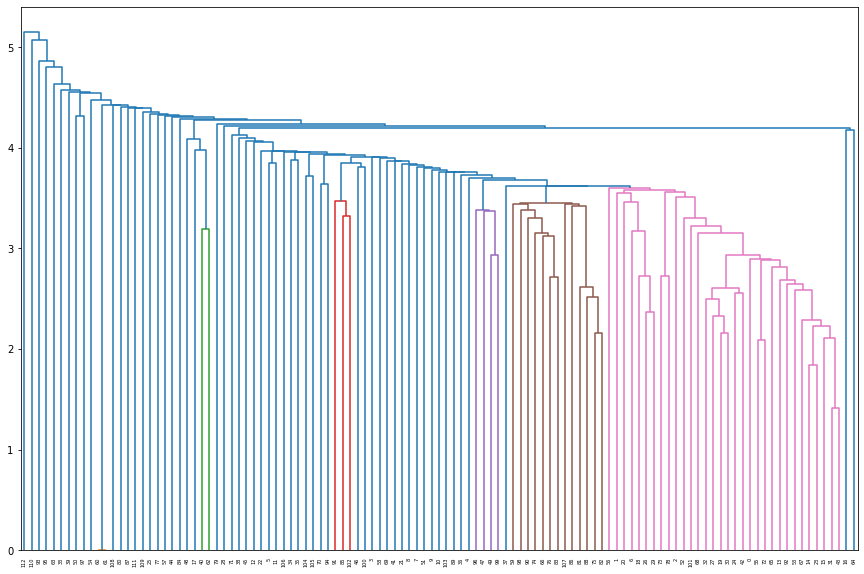

In [11]:
X = np.array(result)
Z = hcluster.linkage(X)
plt.figure(figsize=(15, 10))
dn = hcluster.dendrogram(Z)
plt.show()

In [12]:
clusters = hcluster.fcluster(Z, 1.06)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 56


In [13]:
clusters = hcluster.fcluster(Z, 1.2)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 1


In [14]:
clusters = hcluster.fcluster(Z, 0.9)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 63


In [15]:
clusters = hcluster.fcluster(Z, 0.6)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 93


In [16]:
clusters = hcluster.fclusterdata(X, 0.9)
print('Estimated number of clusters: %d' % len(set(clusters)))
print(clusters)

Estimated number of clusters: 63
[16 12 20 36 23  4 12 30 31 28 27  4 39 16 16 16 43  3 12 14 12 32 38 16
 15 50 12 14 44 12 14 16 14 58  5  5 24 22 41 57  3 33 15 16 47 40  8  9
  3  9  1 29 19 16 56 16 21 48 35 10  2  2  3 59 43 16 10 16 17 34  7 42
 16 13 10 11 10 49 13 45 54 11 11 10 46  8 11 53 11 25 10  8 16 61  7 60
  9  1 10  9  8 18  8 26  6  6 37 11 55 51 62 52 63]


###  К-средних (KMeans)

In [17]:
kmeans = KMeans(n_clusters=9).fit(X)
kmeans.labels_

array([5, 7, 7, 8, 8, 8, 7, 7, 2, 8, 8, 8, 2, 5, 5, 5, 2, 6, 7, 8, 7, 8,
       5, 5, 8, 8, 7, 8, 8, 7, 8, 5, 8, 8, 2, 5, 2, 5, 8, 2, 6, 8, 5, 5,
       0, 2, 2, 4, 6, 4, 2, 5, 5, 5, 1, 5, 2, 2, 8, 1, 2, 2, 6, 2, 2, 5,
       3, 5, 5, 1, 4, 8, 5, 5, 1, 1, 3, 3, 5, 2, 2, 1, 1, 3, 2, 2, 1, 4,
       1, 4, 3, 2, 5, 0, 4, 1, 4, 2, 1, 4, 2, 5, 2, 4, 4, 4, 3, 1, 2, 1,
       2, 3, 8], dtype=int32)

Выбрала 9, поскольку в словарях максимально 11 значений (из того, что я нашла), но модель, которую я взяла, обучена на не такой большой выборке (в сравнении с другими), поэтому решила взять немного меньше кластеров

In [18]:
array = kmeans.cluster_centers_

In [19]:
sample = result[17:20]
kmeans.predict(sample)

array([6, 7, 8], dtype=int32)

In [20]:
array[0][0:10]

array([ 0.08338669, -0.54203666, -0.04645689, -0.06773267,  0.30666623,
       -0.27514734, -0.36507736,  0.31013284,  0.13047652, -0.23580394])